<a href="https://colab.research.google.com/github/MaanasSM/Deep-Learning-Mini-Projects/blob/main/Face_Detection_lab7_5_3_2024.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Install necessary libraries
!pip install torch torchvision facenet-pytorch kaggle


INFO: pip is looking at multiple versions of facenet-pytorch to determine which version is compatible with other requirements. This could take a while.
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 4.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 14.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 55.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 42.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 2.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 5.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 11.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 7.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 5.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 18.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.9/1.9

In [ ]:
# Import required libraries
import os
import torch
import torchvision.transforms as transforms
from facenet_pytorch import MTCNN, InceptionResnetV1
from torch.utils.data import DataLoader, Dataset
from PIL import Image
import matplotlib.pyplot as plt
# import kaggle

In [ ]:
# Set Kaggle API credentials (No need to upload kaggle.json)
os.environ["KAGGLE_USERNAME"] = "bluelemons"  # Replace with your Kaggle username
os.environ["KAGGLE_KEY"] = "c38c25cd236ce5e4b41dca03bfd8a46f"  # Replace with your Kaggle API key

In [ ]:
# Download dataset from Kaggle (Replace with actual dataset ID)
KAGGLE_DATASET = "sbaghbidi/human-faces-object-detection"
!kaggle datasets download -d {KAGGLE_DATASET} --unzip -p /content/kaggle_dataset

Dataset URL: https://www.kaggle.com/datasets/sbaghbidi/human-faces-object-detection
License(s): unknown
 99% 495M/498M [00:12<00:00, 43.7MB/s]
100% 498M/498M [00:12<00:00, 41.9MB/s]


In [ ]:
# Define dataset path
dataset_path = "/content/kaggle_dataset/images"
print("Files in dataset:", os.listdir(dataset_path))

Files in dataset: ['00002168.jpg', '00000755.jpg', '00003449.jpg', '00003200.jpg', '00002086.jpg', '00002167.jpg', '00000785.jpg', '00001684.jpg', '00001551.jpg', '00001893.jpg', '00003298.jpg', '00002360.jpg', '00002147.jpg', '00002563.jpg', '00002600.jpg', '00002074.jpg', '00002989.jpg', '00002497.jpg', '00002640.jpg', '00000777.jpg', '00002514.jpg', '00000110.jpg', '00000758.jpg', '00002867.jpg', '00001556.jpg', '00000103.jpg', '00003465.jpg', '00000944.jpg', '00002759.jpg', '00000955.jpg', '00001520.jpg', '00001432.jpg', '00000774.jpg', '00002139.jpg', '00002051.jpg', '00003351.jpg', '00001413.jpg', '00001384.jpg', '00000558.jpg', '00000204.jpg', '00002775.jpg', '00002134.jpg', '00000530.jpg', '00001603.jpg', '00002836.jpg', '00002802.jpg', '00000767.jpg', '00001426.jpg', '00002841.jpg', '00000104.jpg', '00001133.jpg', '00001441.jpg', '00000460.jpg', '00003405.jpg', '00002966.jpg', '00002696.jpg', '00000609.jpg', '00002211.jpg', '00002708.jpg', '00001198.jpg', '00001942.jpg', '0000

In [ ]:
# Initialize MTCNN for face detection
mtcnn = MTCNN(keep_all=True, device=torch.device("cuda" if torch.cuda.is_available() else "cpu"))

/usr/local/lib/python3.11/dist-packages/facenet_pytorch/models/mtcnn.py:34: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  state_dict = torch.load(state_dict_path)
/usr/local

In [ ]:
# Define a custom dataset class
class FaceDataset(Dataset):
    def __init__(self, root_dir, transform=None):
        self.root_dir = root_dir
        self.transform = transform
        self.image_files = [f for f in os.listdir(root_dir) if f.endswith(('.jpg', '.png', '.jpeg'))]
        if len(self.image_files) == 0:
            raise ValueError("No image files found in the dataset directory!")

    def __len__(self):
        return len(self.image_files)

    def __getitem__(self, idx):
        img_path = os.path.join(self.root_dir, self.image_files[idx])
        image = Image.open(img_path).convert("RGB")

        if self.transform:
            image = self.transform(image)

        return image

In [ ]:
# Define transformations
transform = transforms.Compose([
    transforms.Resize((160, 160)),
    transforms.ToTensor()
])

In [ ]:
# Load dataset
dataset = FaceDataset(root_dir=dataset_path, transform=transform)
dataloader = DataLoader(dataset, batch_size=16, shuffle=True)


In [1]:
# Load pre-trained FaceNet model for fine-tuning
# model = InceptionResnetV1(pretrained='vggface2').eval() #uncomment this line when running the code

In [ ]:
# Training Loop (Fine-tune model)
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)
criterion = torch.nn.CrossEntropyLoss()
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model.to(device)

num_epochs = 5
print("Training Started...")
for epoch in range(num_epochs):
    model.train()
    running_loss = 0.0
    for images in dataloader:
        images = images.to(device)
        optimizer.zero_grad()
        outputs = model(images)
        labels = torch.ones(len(images), dtype=torch.long).to(device)  # Dummy labels
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
        running_loss += loss.item()
    print(f"Epoch [{epoch+1}/{num_epochs}], Loss: {running_loss/len(dataloader):.4f}")
print("Training Complete!")

Training Started...
Epoch [1/5], Loss: 5.8778
Epoch [2/5], Loss: 5.5881
Epoch [3/5], Loss: 5.5224
Epoch [4/5], Loss: 5.4644
Epoch [5/5], Loss: 5.4298
Training Complete!


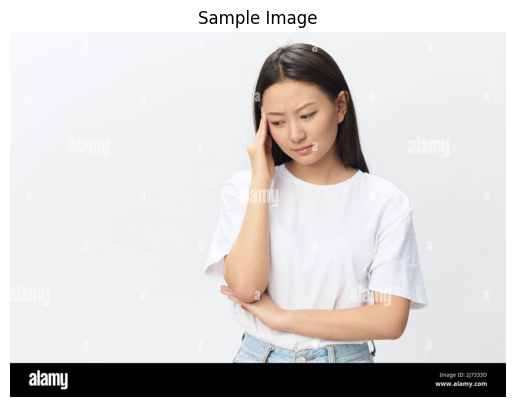

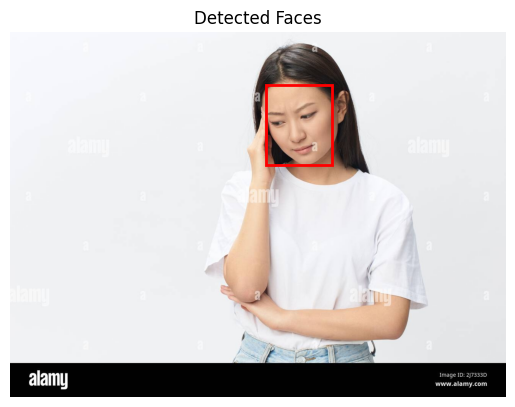

In [ ]:
# Test face detection on a sample image
sample_image_path = os.path.join(dataset_path, os.listdir(dataset_path)[63])
sample_image = Image.open(sample_image_path).convert("RGB")
plt.imshow(sample_image)
plt.title("Sample Image")
plt.axis("off")
plt.show()

# Detect faces
boxes, _ = mtcnn.detect(sample_image)
if boxes is not None:
    for box in boxes:
        plt.gca().add_patch(plt.Rectangle((box[0], box[1]), box[2]-box[0], box[3]-box[1],
                                          linewidth=2, edgecolor='red', facecolor='none'))
plt.imshow(sample_image)
plt.title("Detected Faces")
plt.axis("off")
plt.show()
